In [70]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import joblib
import tensorflow as tf

In [71]:
from sklearn.datasets import load_breast_cancer

# Cargar el dataset de cáncer de mama
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [72]:
df2 = df.copy()
print('Número de observaciones (filas) = {}'.format(df2.shape[0]))
print('Total de variables disponibles (columnas) = {} '.format(df2.columns.shape[0]))
print('Columnas que cuentan con un valor nulo -')
print(df2.isnull().sum())

Número de observaciones (filas) = 569
Total de variables disponibles (columnas) = 30 
Columnas que cuentan con un valor nulo -
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dty

In [73]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [74]:
df2['target'] = data.target

In [75]:
df2.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [76]:
X = df2.drop(columns=['target'])
y = df2['target']

In [77]:
# Columnas a standalizar

numeric_features = ['mean radius','mean texture','mean perimeter','mean area','worst radius','worst texture','worst perimeter']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo

In [79]:
oculta = tf.keras.layers.Dense(units=6,input_shape=[30])
oculta1 = tf.keras.layers.Dense(units=6)
salida = tf.keras.layers.Dense(units=1,activation='sigmoid') 
modelo = tf.keras.Sequential([oculta,oculta1,salida])

c:\Users\FRANK\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:
modelo.compile(optimizer=tf.keras.optimizers.Adam(0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [81]:
print('Comenzando entrenamiento')
historial = modelo.fit(X_train,y_train,epochs=2000,verbose=False)
print('Modelo entrenado')

Comenzando entrenamiento
Modelo entrenado


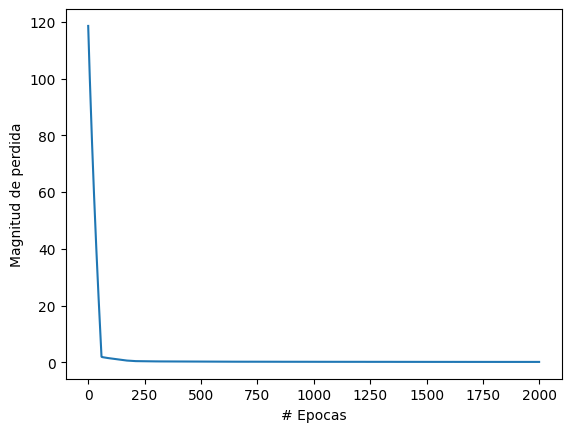

In [82]:
plt.xlabel('# Epocas')
plt.ylabel('Magnitud de perdida')
plt.plot(historial.history['loss'])

In [83]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,1.886690,-1.359293,2.303601,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1.829821,-0.353632,1.685955,1.908708,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,1.805927,-0.369203,1.535126,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1.579888,0.456187,1.566503,1.558884,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,1.511870,-0.023974,1.347475,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,-0.768909,0.253732,-0.592687,-0.764464,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,-0.281464,0.133984,-0.249939,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1.750297,-1.151816,1.776573,1.826229,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,1.298575,-1.466770,1.338539,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [84]:
# Realizar la predicción
print('Vamos a hacer una predicción')
nuevo_dato = np.array([[1, 3, 10, 70, 10, 10, 15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])  # Ejemplo de nuevo dato con las 7 características numéricas
nuevo_dato[:, :7] = scaler.transform(nuevo_dato[:, :7])  # Escalar las características numéricas
resultado = modelo.predict(nuevo_dato)

print(f'El resultado es: {resultado[0][0]}')

Vamos a hacer una predicción
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
El resultado es: 0.9999346137046814


c:\Users\FRANK\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [85]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,1.886690,-1.359293,2.303601,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1.829821,-0.353632,1.685955,1.908708,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,1.805927,-0.369203,1.535126,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1.579888,0.456187,1.566503,1.558884,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,1.511870,-0.023974,1.347475,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,-0.768909,0.253732,-0.592687,-0.764464,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,-0.281464,0.133984,-0.249939,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1.750297,-1.151816,1.776573,1.826229,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,1.298575,-1.466770,1.338539,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [86]:
if resultado[0][0] > 0.5:
  print(f'El resultado es: {resultado[0][0]}, predicción: Maligno')
else:
    print(f'El resultado es: {resultado[0][0]}, predicción: Benigno')

El resultado es: 0.9999346137046814, predicción: Maligno


In [87]:
predicciones = modelo.predict(X)
predicciones_binarias = (predicciones > 0.5).astype(int)
df2['predicción'] = predicciones_binarias

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [88]:
df2.head(20)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,predicción
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,0,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,0,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,0,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,0,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,0,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,0,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,0,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,0,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,0,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,0,0


In [89]:
# Predicciones correctas
correct_predictions = (df2['target'] == df2['predicción']).sum()

# Calcular el total
total_predictions = len(df2)

# Precisión
precision = (correct_predictions / total_predictions) * 100
print(f'Precisión: {precision:.2f}%')
print(f'Precisión: {100-precision:.2f}%')

Precisión: 96.66%
Precisión: 3.34%


**1000 epochs
3/3 Neuronas
Precisión: 94.73%
Margen de error: 5.27%**

**2000 epochs
3/3 Neuronas Precisión: 96.66%
Margen de error: 3.34%**

**2000 epochs
6/6 Neuronas
Precisión: 96.49%
Margen de error: 3.51%**